# Introduction

In this project, you will act as a data visualization developer at Yahoo Finance! You will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, you will only visualize data for the year of 2017. Specifically, you will be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).



Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Step 1

Let's get our notebook ready for visualizing! Import the modules that you'll be using in this project:

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2

Load **NFLX.csv** into a DataFrame called `netflix_stocks`. 

In [34]:
netflix_stocks = pd.read_csv('NFLX.csv')
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


Load **DJI.csv** into a DataFrame called `dowjones_stocks`. Then, quickly inspect the DataFrame using `print()`.

Note: You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 


In [5]:
dowjones_stocks = pd.read_csv('DJI.csv')
dowjones_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


Load **NFLX_daily_by_quarter.csv** into a DataFrame called `netflix_stocks_quarterly`. Then, quickly inspect the DataFrame using `print()`.


In [8]:
netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


## Step 3

Let's learn more about our data. The datasets are large and it may be easier to view the entire dataset locally on your computer. Open the CSV files directly from the folder you downloaded for this project.


In [11]:
print(netflix_stocks.Date.unique())
print(dowjones_stocks.Date.unique())
print(netflix_stocks_quarterly.Date.unique())

['2017-01-01' '2017-02-01' '2017-03-01' '2017-04-01' '2017-05-01'
 '2017-06-01' '2017-07-01' '2017-08-01' '2017-09-01' '2017-10-01'
 '2017-11-01' '2017-12-01']
['2017-01-01' '2017-02-01' '2017-03-01' '2017-04-01' '2017-05-01'
 '2017-06-01' '2017-07-01' '2017-08-01' '2017-09-01' '2017-10-01'
 '2017-11-01' '2017-12-01']
['2017-01-03' '2017-01-04' '2017-01-05' '2017-01-06' '2017-01-09'
 '2017-01-10' '2017-01-11' '2017-01-12' '2017-01-13' '2017-01-17'
 '2017-01-18' '2017-01-19' '2017-01-20' '2017-01-23' '2017-01-24'
 '2017-01-25' '2017-01-26' '2017-01-27' '2017-01-30' '2017-01-31'
 '2017-02-01' '2017-02-02' '2017-02-03' '2017-02-06' '2017-02-07'
 '2017-02-08' '2017-02-09' '2017-02-10' '2017-02-13' '2017-02-14'
 '2017-02-15' '2017-02-16' '2017-02-17' '2017-02-21' '2017-02-22'
 '2017-02-23' '2017-02-24' '2017-02-27' '2017-02-28' '2017-03-01'
 '2017-03-02' '2017-03-03' '2017-03-06' '2017-03-07' '2017-03-08'
 '2017-03-09' '2017-03-10' '2017-03-13' '2017-03-14' '2017-03-15'
 '2017-03-16' '2017-

+ Is the data represented by days, weeks, or months? 
+ In which ways are the files different? 
+ What's different about the columns for `netflix_stocks` versus `netflix_stocks_quarterly`?

In [ ]:
All, quarterly, fisrt day of the months vs every date in the quarter

## Step 4

Great! Now that we have spent sometime looking at the data, let's look at the column names of the DataFrame `netflix_stocks` using `.head()`. 

In [12]:
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


What do you notice? The first two column names are one word each, and the only one that is not is `Adj Close`! 

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Use Pandas to change the name of of the column to `Adj Close` to `Price` so that it is easier to work with the data. Remember to use `inplace=True`.

Do this for the Dow Jones and Netflix Quarterly pandas dataframes as well.


In [36]:
netflix_stocks.rename(columns={'Adj Close':'Price'}, inplace=True)
print(netflix_stocks.head())

         Date        Open        High         Low       Close       Price  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


Run `netflix_stocks.head()` again to check your column name has changed.

In [37]:
netflix_stocks.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


Call `.head()` on the DataFrame `dowjones_stocks` and `netflix_stocks_quarterly`.

In [40]:
dowjones_stocks.rename(columns={'Adj Close':'Price'}, inplace=True)
netflix_stocks_quarterly.rename(columns={'Adj Close':'Price'}, inplace=True)

## Step 5

In this step, we will be visualizing the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We can accomplish this using a violin plot with four violins, one for each business quarter!

Text(0, 0.5, 'Closing Stock Price')

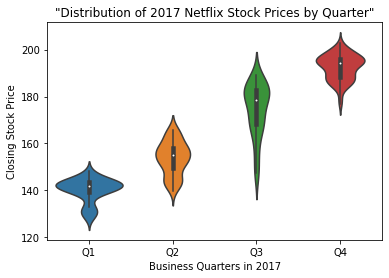

In [42]:
ax = sns.violinplot(x = 'Quarter' , y = 'Price', data = netflix_stocks_quarterly)
ax.set_title('"Distribution of 2017 Netflix Stock Prices by Quarter"')
plt.xlabel('Business Quarters in 2017')
plt.ylabel('Closing Stock Price')

## Step 6

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter chart. 

Text(0.5, 1.0, 'Earnings Per Share in Cents')

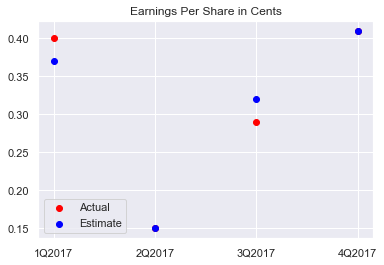

In [44]:
sns.set()
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]
plt.scatter(x_positions, earnings_actual, color = 'red')
plt.scatter(x_positions, earnings_estimate, color = 'blue')
plt.legend(["Actual", "Estimate"])
plt.xticks(x_positions, chart_labels)
plt.title("Earnings Per Share in Cents")

## Step 7

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side. We have visualized a similar chart in the second Matplotlib lesson [Exercise 4](https://www.codecademy.com/courses/learn-matplotlib/lessons/matplotlib-ii/exercises/side-by-side-bars).

As you may recall, plotting side-by-side bars in Matplotlib requires computing the width of each bar before hand. We have pasted the starter code for that exercise below. 

([<matplotlib.axis.XTick at 0x11b94c4c0>,
 [Text(1.2000000000000002, 0, '2Q2017'),
  Text(4.199999999999999, 0, '3Q2017'),
  Text(7.199999999999999, 0, '4Q2017'),
  Text(10.2, 0, '1Q2018')])

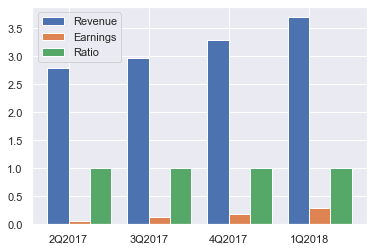

In [55]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]
ratio = [b/a for a,b in zip(earnings_by_quarter,earnings_by_quarter)]
# Revenue
n = 1  # This is our first dataset (out of 2)
t = 3 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars1_x, revenue_by_quarter)


# Earnings
n = 2  # This is our second dataset (out of 2)
t = 3 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars2_x, earnings_by_quarter)

# Ratio
n = 3  # This is our first dataset (out of 2)
t = 3 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars3_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars3_x, ratio)



middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings", 'Ratio']
plt.legend(labels)
plt.xticks(middle_x, quarter_labels)

## Step 8

In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 

Since `Price` which is the most relevant data is in the Y axis, let's map our subplots to align vertically side by side.

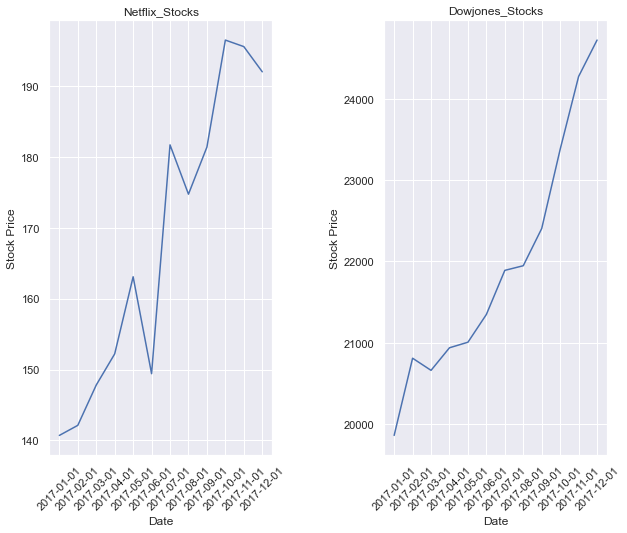

In [104]:
# Left plot Netflix

fig, ax = plt.subplots(1,2, figsize=(10,8))

ax[0].plot(netflix_stocks['Date'], netflix_stocks['Price'])
ax[0].set_title('Netflix_Stocks')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Stock Price')
ax[0].set_xticks(netflix_stocks['Date'])
ax[0].set_xticklabels(netflix_stocks['Date'], rotation = 45)

# Right plot Dow Jones
ax[1].plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
ax[1].set_title('Dowjones_Stocks')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Stock Price')
ax[1].set_xticks(dowjones_stocks['Date'])
ax[1].set_xticklabels(dowjones_stocks['Date'], rotation = 45)
plt.subplots_adjust(wspace=.5)